In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns


In [37]:

# change path if needed
crime = pd.read_csv(r"C:\Users\dell\Desktop\Sakhi-Women-Safety-App\dataset\crime.csv")



In [17]:
crime.head()


,nm_pol,murder,rape,gangrape,robbery,theft,assualt murders,sexual harassement,totarea,totalcrime,long,lat,crime/area,area
0,CHITRANJAN PARK,2,6,1,35,442,19,7,2659329.537,512,77.24920,28.53632,192.529731,2.659330
1,DABRI,8,28,0,79,240,26,16,3401013.428,397,77.08600,28.61268,116.729912,3.401013
2,MALVIYA NAGAR,3,28,1,33,694,63,15,1379853.572,837,77.20418,28.52989,606.586102,1.379854
3,CHANDNI MAHAL,1,8,1,23,529,19,7,5570696.132,588,77.23608,28.64361,105.552338,5.570696
4,MODEL TOWN,0,4,1,45,393,9,14,2689157.085,466,77.19369,28.70257,173.288501,2.689157


In [49]:
#STANDARDIZE COLUMN NAMES
# ===========================================
crime.columns = crime.columns.str.strip().str.lower().str.replace(" ", "_")
crime.rename(columns={
    "assualt_murders": "assault_murders",
    "sexual_harassement": "sexual_harassment",
    "crime/area": "crime_per_area"
}, inplace=True)

In [50]:
#KEEP ONLY REQUIRED COLUMNS
# ===========================================
keep_cols = ['nm_pol', 'area', 'rape', 'gangrape', 'sexual_harassment',
             'totarea', 'lat', 'long', 'totalcrime', 'crime_per_area']

df = crime[keep_cols]


In [55]:
print("Shape:", df.shape)



Shape: (166, 10)


In [60]:
print("\nData Types:\n", df.dtypes)



Data Types:
 nm_pol                object
area                 float64
rape                   int64
gangrape               int64
sexual_harassment      int64
totarea              float64
lat                  float64
long                 float64
totalcrime             int64
crime_per_area       float64
dtype: object


In [53]:
print("\nColumns:\n", df.columns)



Columns:
 Index(['nm_pol', 'area', 'rape', 'gangrape', 'sexual_harassment', 'totarea',
       'lat', 'long', 'totalcrime', 'crime_per_area'],
      dtype='object')


In [56]:
print("\nInfo:")
df.info()


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   nm_pol             166 non-null    object 
 1   area               166 non-null    float64
 2   rape               166 non-null    int64  
 3   gangrape           166 non-null    int64  
 4   sexual_harassment  166 non-null    int64  
 5   totarea            166 non-null    float64
 6   lat                166 non-null    float64
 7   long               166 non-null    float64
 8   totalcrime         166 non-null    int64  
 9   crime_per_area     166 non-null    float64
dtypes: float64(5), int64(4), object(1)
memory usage: 13.1+ KB


In [57]:
print("\nSample rows:")
display(df.head(10))


Sample rows:


,nm_pol,area,rape,gangrape,sexual_harassment,totarea,lat,long,totalcrime,crime_per_area
0,CHITRANJAN PARK,2.659330,6,1,7,2659329.537,28.53632,77.24920,512,192.529731
1,DABRI,3.401013,28,0,16,3401013.428,28.61268,77.08600,397,116.729912
2,MALVIYA NAGAR,1.379854,28,1,15,1379853.572,28.52989,77.20418,837,606.586102
3,CHANDNI MAHAL,5.570696,8,1,7,5570696.132,28.64361,77.23608,588,105.552338
4,MODEL TOWN,2.689157,4,1,14,2689157.085,28.70257,77.19369,466,173.288501
5,ANANDVIHAR,4.558970,14,0,15,4558969.692,28.65335,77.29373,619,135.776292
6,KASHMERE GATE,1.627910,9,3,12,1627909.974,28.66645,77.22618,398,244.485264
7,GOVIND PURI,8.992712,4,3,5,8992712.060,28.53067,77.26532,741,82.400059
8,BINDAPUR,2.568080,4,1,8,2568079.500,28.60910,77.06618,509,198.202587
9,NEW FRIENDS COLONY,4.045387,7,1,10,4045386.710,28.56234,77.26760,694,171.553438


In [58]:
print("\nSummary stats (numeric):")
df.describe()



Summary stats (numeric):


,area,rape,gangrape,sexual_harassment,totarea,lat,long,totalcrime,crime_per_area
count,166.000000,166.000000,166.000000,166.000000,1.660000e+02,166.000000,166.000000,166.000000,166.000000
mean,7.453897,11.765060,0.933735,9.469880,7.453897e+06,28.641116,77.186804,478.879518,166.570299
std,11.602075,7.736508,1.216730,7.225103,1.160207e+07,0.066989,0.087788,251.008555,143.514109
min,0.878453,0.000000,0.000000,0.000000,8.784528e+05,28.465490,76.915550,62.000000,4.395489
25%,1.955090,6.000000,0.000000,4.000000,1.955090e+06,28.598382,77.121842,295.250000,54.204542
50%,2.975209,10.500000,1.000000,8.000000,2.975209e+06,28.647675,77.202950,461.000000,135.776292
75%,6.082123,16.000000,1.000000,12.750000,6.082123e+06,28.684777,77.256358,616.000000,230.131065
max,70.469487,43.000000,6.000000,40.000000,7.046949e+07,28.853210,77.332670,1433.000000,792.025514


In [61]:
# top districts
print("\nDistrict value counts:")
print(df['nm_pol'].value_counts().head(15))






District value counts:
nm_pol
RAJOURI GARDEN        2
BAWANA                2
ANANDVIHAR            2
KASHMERE GATE         2
BINDAPUR              2
SARITA VIHAR          2
SAFDARJUNG ENCLAVE    2
KALKAJI               2
PRASHANT VIHAR        2
CHITRANJAN PARK       1
HAUZ KHAS             1
RANHOLA               1
SAKET                 1
SHAKARPUR             1
PREETVIHAR            1
Name: count, dtype: int64


In [63]:
print("\nUnique police locations (nm_pol):", df['nm_pol'].nunique())
print(df['nm_pol'].head(10))




Unique police locations (nm_pol): 157
0       CHITRANJAN PARK
1                 DABRI
2         MALVIYA NAGAR
3         CHANDNI MAHAL
4            MODEL TOWN
5            ANANDVIHAR
6         KASHMERE GATE
7           GOVIND PURI
8              BINDAPUR
9    NEW FRIENDS COLONY
Name: nm_pol, dtype: object


In [64]:
print("\nUnique area labels:", df['area'].nunique())
print(df['area'].head(10))



Unique area labels: 134
0    2.659330
1    3.401013
2    1.379854
3    5.570696
4    2.689157
5    4.558970
6    1.627910
7    8.992712
8    2.568080
9    4.045387
Name: area, dtype: float64


In [65]:
print("\nMissing values per column:")
print(df.isna().sum())



Missing values per column:
nm_pol               0
area                 0
rape                 0
gangrape             0
sexual_harassment    0
totarea              0
lat                  0
long                 0
totalcrime           0
crime_per_area       0
dtype: int64


In [66]:
print("\nDuplicate rows:", df.duplicated().sum())



Duplicate rows: 0


In [80]:
# Ensure numeric columns convert properly
numeric_cols = ['rape', 'gangrape', 'sexual_harassment', 'totarea',
                'lat', 'long', 'totalcrime', 'crime_per_area']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

C:\Users\dell\AppData\Local\Temp\ipykernel_16888\620066109.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')


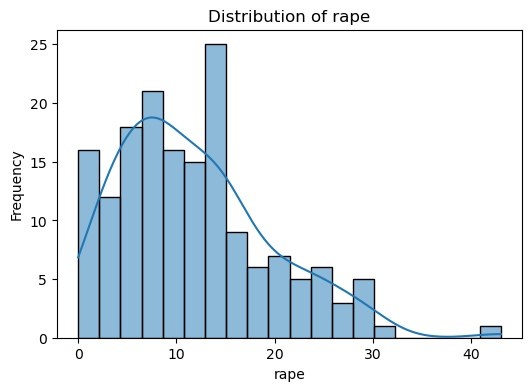

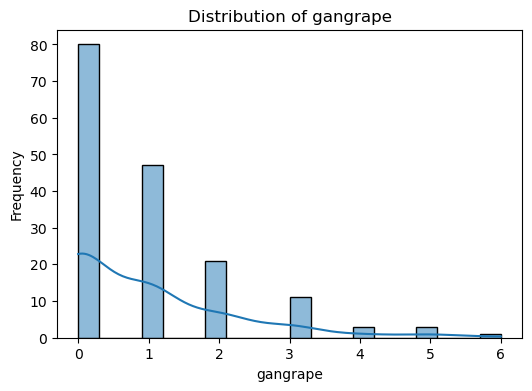

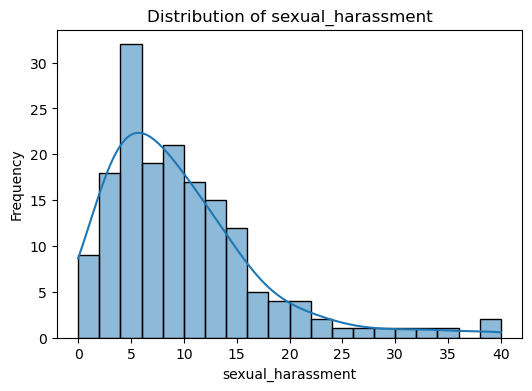

In [81]:

# UNIVARIATE DISTRIBUTION PLOTS
# ===========================================
for col in ['rape', 'gangrape', 'sexual_harassment']:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


Multivariate EDA


In [82]:
# Create df_num for correlation & further analysis
df_num = df[numeric_cols].copy().dropna(how='all')

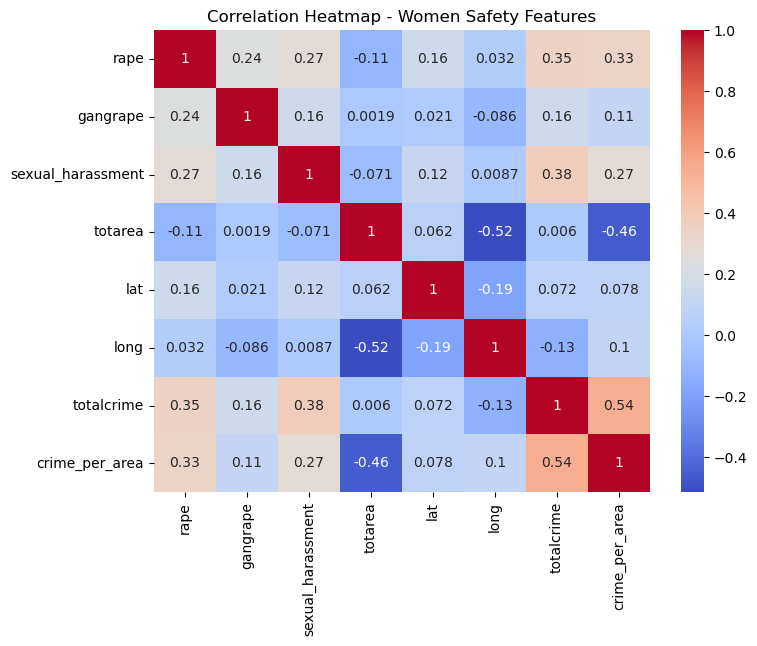

In [83]:
#Correlation heatmap


plt.figure(figsize=(8,6))
sns.heatmap(df_num.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap - Women Safety Features")
plt.show()

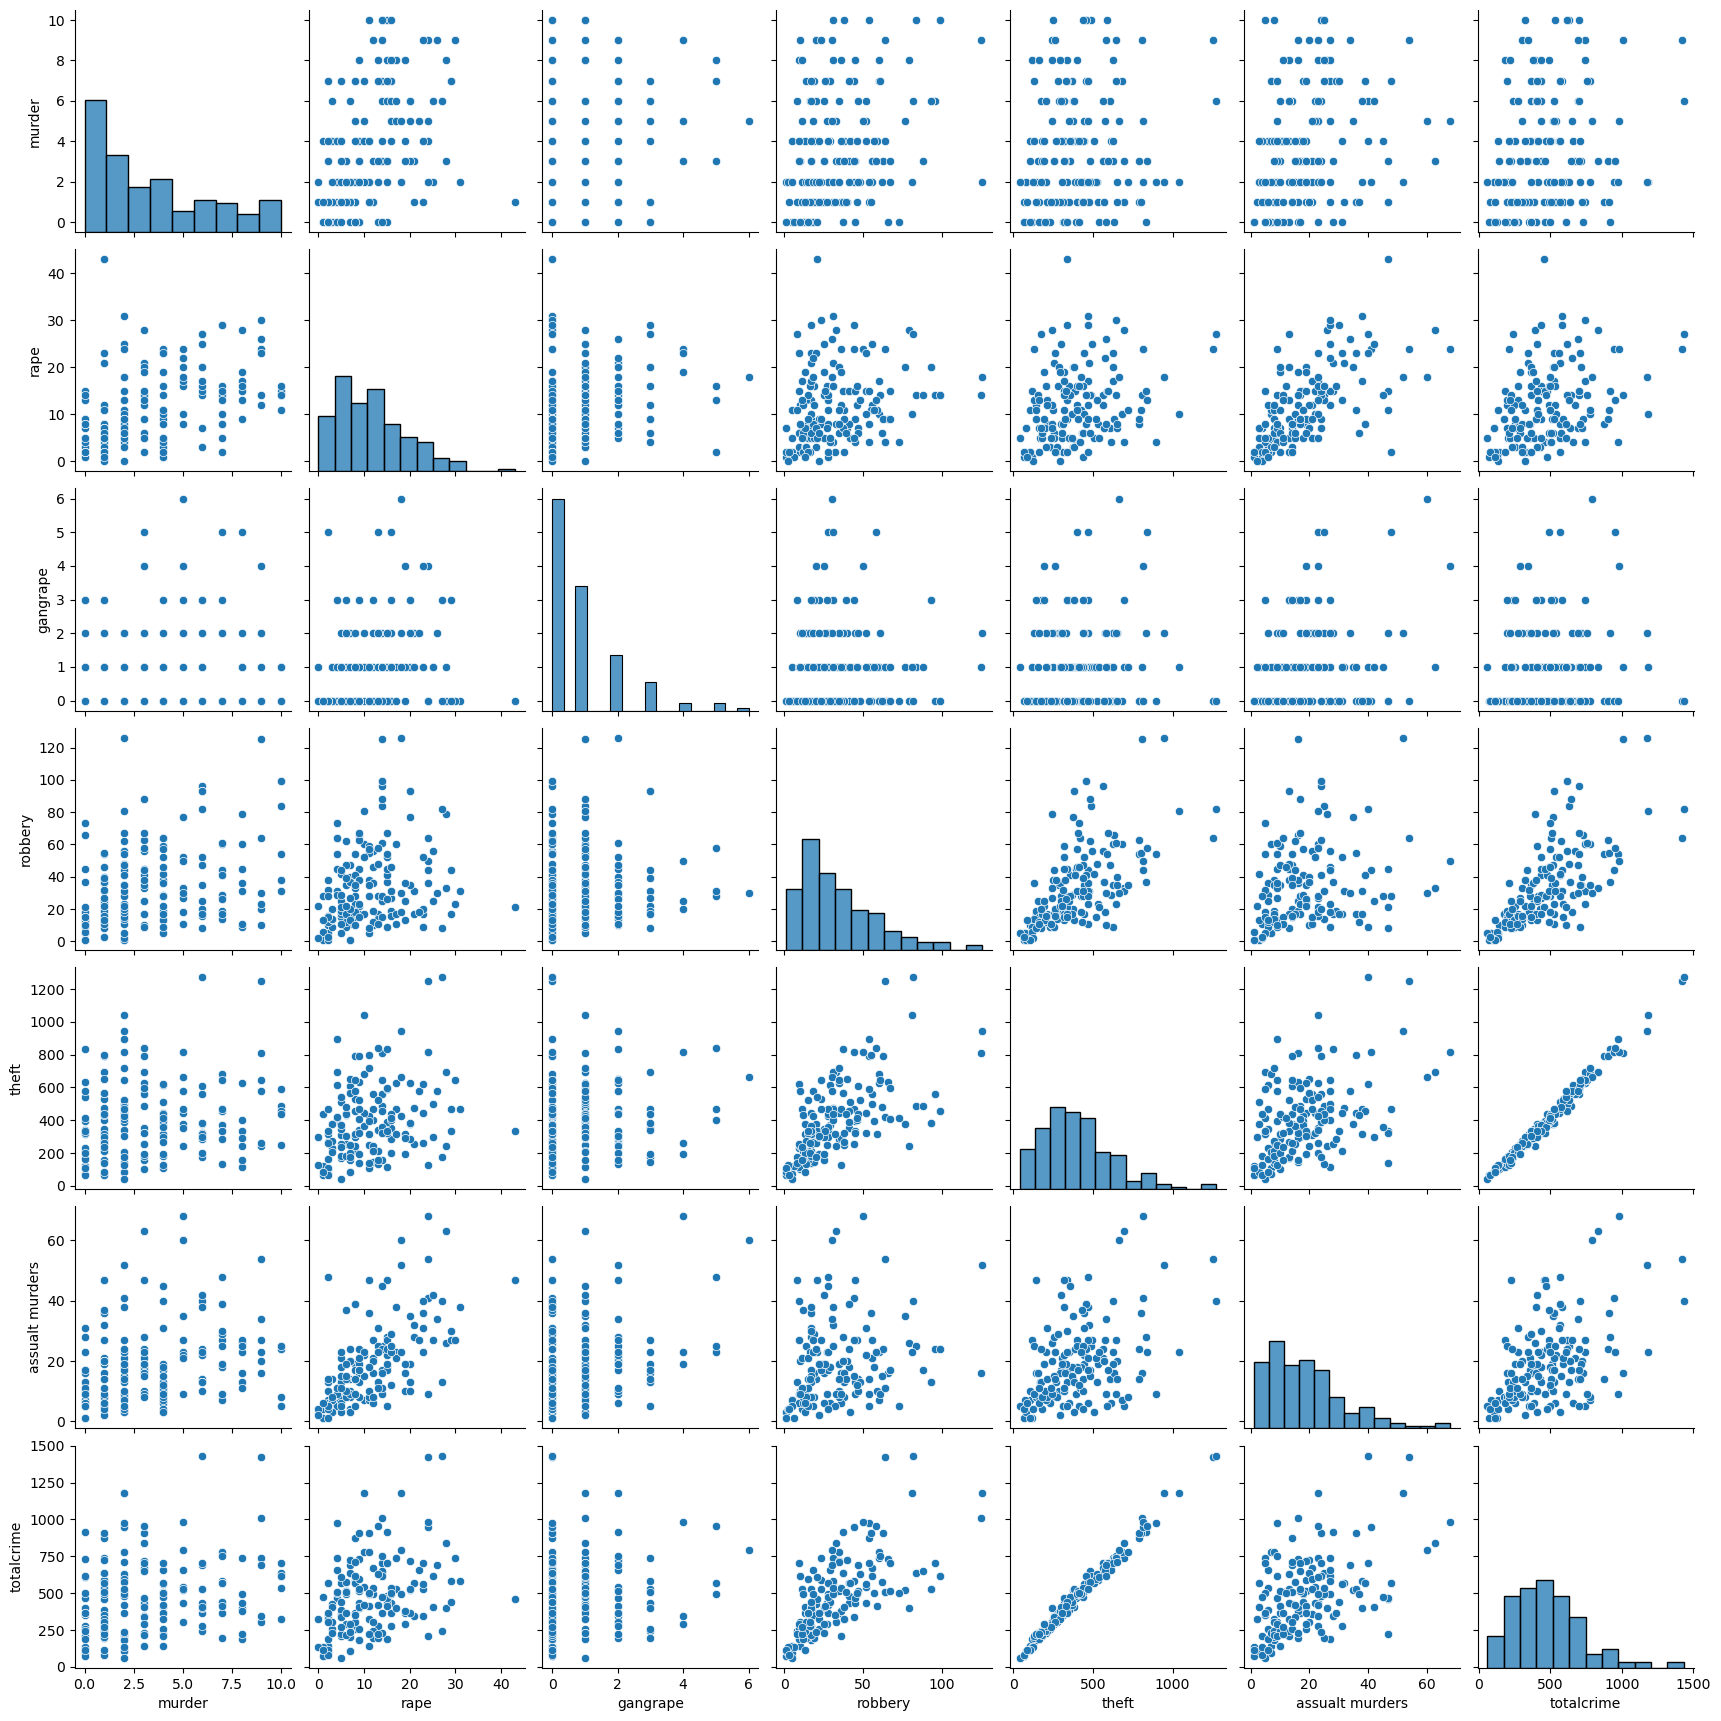

In [78]:
#Pairplot to view crime relationships
sns.pairplot(numeric_df)
plt.show()

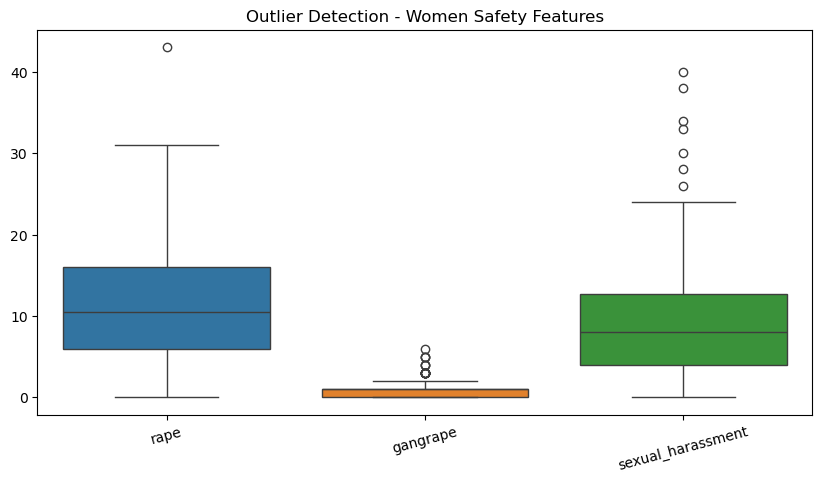

In [76]:
#OUTLIER CHECK USING BOXPLOTS
# ===========================================
plt.figure(figsize=(10,5))
sns.boxplot(data=df[['rape','gangrape','sexual_harassment']])
plt.title("Outlier Detection - Women Safety Features")
plt.xticks(rotation=15)
plt.show()

In [86]:
print("Preprocessing Complete")
print("df shape:", df.shape)
print("df_num shape:", df_num.shape)

Preprocessing Complete
df shape: (166, 10)
df_num shape: (166, 8)


Feature engineering 


In [87]:
# HYBRID RISK SCORE FEATURE ENGINEERING
# ==========================================



# Step 1: Base severity weights (domain knowledge)
severity_weights = {
    'rape': 5,
    'gangrape': 5,
    'sexual_harassment': 3
}

In [88]:
#ML model-driven importance
features = ['rape', 'gangrape', 'sexual_harassment']
X = df[features]
y = df['totalcrime']  # using total crimes as outcome baseline

rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

importance_scores = rf.feature_importances_
importance_dict = dict(zip(features, importance_scores))

print("=== ML-driven Importance ===")
print(importance_dict)


=== ML-driven Importance ===
{'rape': 0.3842754282989549, 'gangrape': 0.12698290298998902, 'sexual_harassment': 0.4887416687110562}


In [89]:
#Hybrid score calculation
df['hybrid_score'] = 0
for feature in features:
    df['hybrid_score'] += df[feature] * severity_weights[feature] * importance_dict[feature]


C:\Users\dell\AppData\Local\Temp\ipykernel_16888\1702141898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hybrid_score'] = 0
C:\Users\dell\AppData\Local\Temp\ipykernel_16888\1702141898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hybrid_score'] += df[feature] * severity_weights[feature] * importance_dict[feature]
C:\Users\dell\AppData\Local\Temp\ipykernel_16888\1702141898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [90]:
 #Normalize hybrid score (0–100)
scaler = MinMaxScaler(feature_range=(0, 100))
df['risk_score'] = scaler.fit_transform(df[['hybrid_score']])

print("\nNormalized Risk Score (0-100) created!")

df[['nm_pol','area','rape','gangrape','sexual_harassment','risk_score']].head()


Normalized Risk Score (0-100) created!


C:\Users\dell\AppData\Local\Temp\ipykernel_16888\3890317695.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['risk_score'] = scaler.fit_transform(df[['hybrid_score']])


,nm_pol,area,rape,gangrape,sexual_harassment,risk_score
0,CHITRANJAN PARK,2.659330,6,1,7,23.053469
1,DABRI,3.401013,28,0,16,79.417141
2,MALVIYA NAGAR,1.379854,28,1,15,78.562600
3,CHANDNI MAHAL,5.570696,8,1,7,27.003609
4,MODEL TOWN,2.689157,4,1,14,29.653719


In [91]:
from sklearn.cluster import KMeans

# KMeans clustering into 4 levels
kmeans = KMeans(n_clusters=4, random_state=42)
df['risk_cluster'] = kmeans.fit_predict(df[['risk_score']])

# Order clusters based on score
cluster_order = df.groupby('risk_cluster')['risk_score'].mean().sort_values().index.tolist()

labels = {
    cluster_order[0]: 'Very Low',
    cluster_order[1]: 'Low',
    cluster_order[2]: 'Medium',
    cluster_order[3]: 'High'
}

df['risk_level'] = df['risk_cluster'].map(labels)

df[['nm_pol','area','risk_score','risk_level']].head()


C:\Users\dell\AppData\Local\Temp\ipykernel_16888\2222163794.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['risk_cluster'] = kmeans.fit_predict(df[['risk_score']])
C:\Users\dell\AppData\Local\Temp\ipykernel_16888\2222163794.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['risk_level'] = df['risk_cluster'].map(labels)


,nm_pol,area,risk_score,risk_level
0,CHITRANJAN PARK,2.659330,23.053469,Very Low
1,DABRI,3.401013,79.417141,High
2,MALVIYA NAGAR,1.379854,78.562600,High
3,CHANDNI MAHAL,5.570696,27.003609,Low
4,MODEL TOWN,2.689157,29.653719,Low


In [94]:
df.to_csv(r"C:\Users\dell\Desktop\Sakhi-Women-Safety-App\dataset\preprocessed_data.csv", index=False)
print("File saved!")


File saved!


nm_pol               0
area                 0
rape                 0
gangrape             0
sexual_harassment    0
totarea              0
lat                  0
long                 0
totalcrime           0
crime_per_area       0
hybrid_score         0
risk_score           0
risk_cluster         0
risk_level           0
dtype: int64